# Global Terrorism

As a security/defense analyst, try to find out the hot zone of terrorism. 

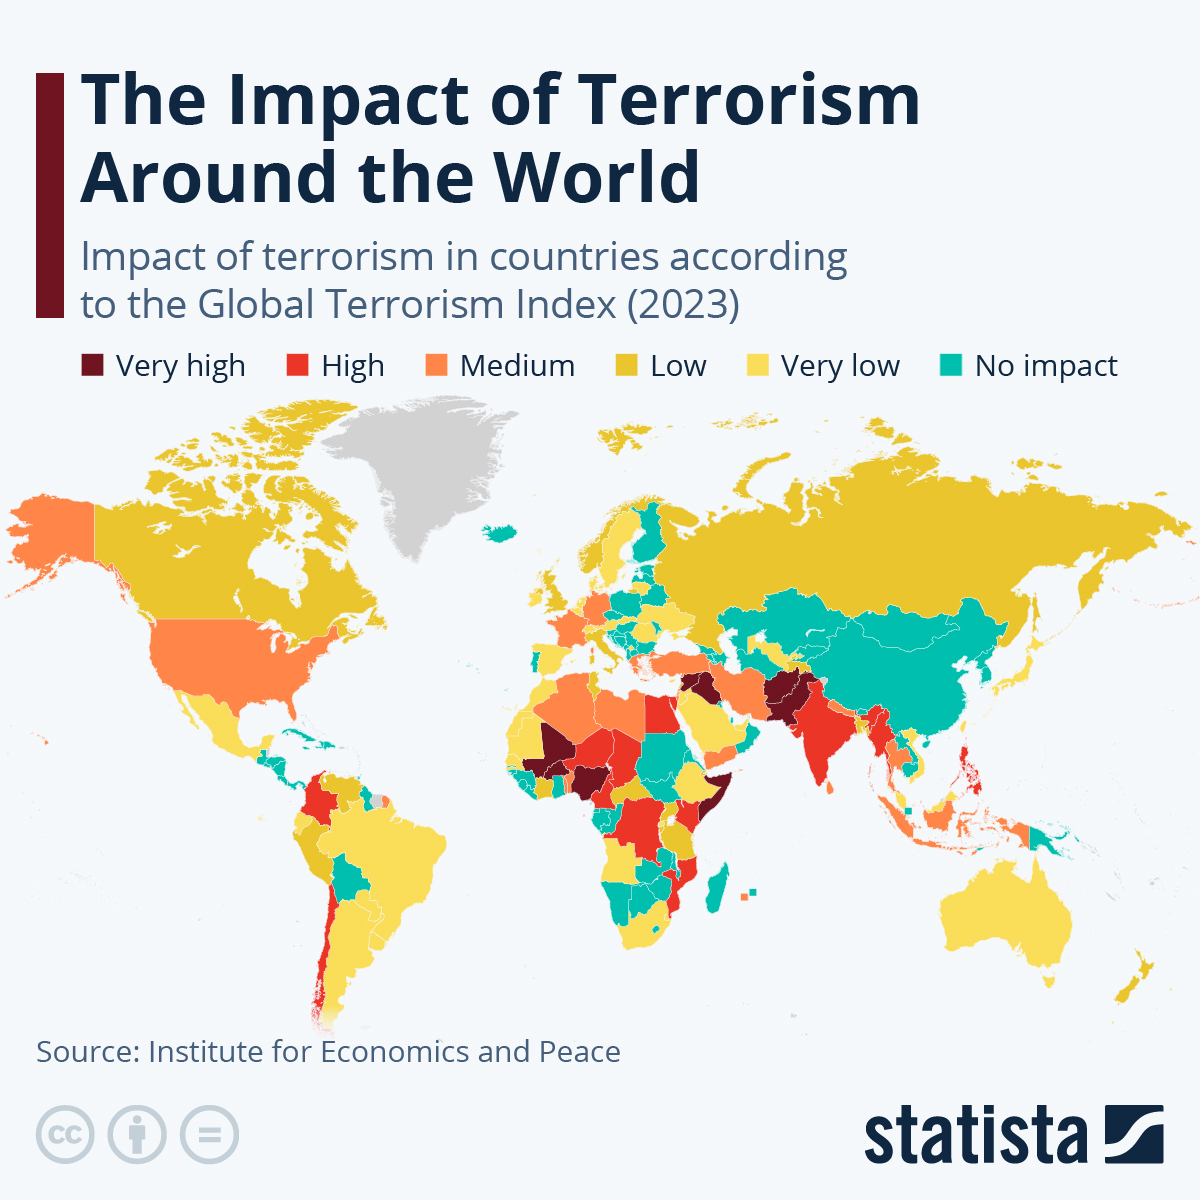

In [ ]:
#load the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#display all columns
pd.set_option('display.max_columns',200)
#display all rows
pd.options.display.max_rows=None

In [ ]:
#read the csv file...
df = pd.read_csv("/content/drive/MyDrive/Data Sets/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

In [ ]:
#print the frist 5 row
df.head()

In [ ]:
#check the dataset shape
df.shape

In [ ]:
#check the dtype of dataset
df.info(verbose=True)

In [ ]:
#check the describe function 
df.describe()

In [ ]:
#check the null values
df.isnull().sum()

In [ ]:
#check the duplicate values
df.duplicated().sum()

In [ ]:
#select the feature
col= ["iyear","imonth",'iday','country_txt','city','region_txt','latitude','longitude','attacktype1_txt','success','suicide','target1','targtype1_txt','gname','motive','weaptype1_txt',"nkill",'nwound','summary']

In [ ]:
new_df = df[col]
new_df.head()  #print the frist 5 rows

In [ ]:
#check the new dataframe shape
new_df.shape

In [ ]:
#rename the columns
new_df = new_df.rename(columns={'iyear':"year",'imonth':'month','iday':'day','country_txt':'country_name','region_txt':'region_name','attacktype1_txt':'attack_type','target1':'target','targtype1_txt':'traget_type','gname':'group_name','weaptype1_txt':'weapan_type','nkill':'number_of_kills','nwound':'wouned'})

In [ ]:
new_df.head()

In [ ]:
#check the null value in the new dataframe
new_df.isnull().sum()

In [ ]:
#check the duplicat values
new_df.duplicated().sum()

In [ ]:
#drop the duplicate values
new_df.drop_duplicates(keep='first', inplace=True)

In [ ]:
new_df.isnull().sum()

In [ ]:
#add columns casualities
new_df["casualities"] = new_df.number_of_kills+new_df.wouned

## Number Of Terrorist Activities Each Year

In [ ]:
#year wise terrorist attactes
plt.subplots(figsize=(25,6))
sns.countplot(x='year', data=new_df )
plt.xticks(rotation=90)
plt.title("Number of acctive terrorist at each years")

## Terrorist Activities by Region in each Year

In [ ]:
#terrorist active region 
pd.crosstab(new_df.year, new_df.region_name).plot(kind="area",figsize=(20,6))
plt.title("Terrorist Activities by Region in each Year")
plt.ylabel("Number of attacts")
plt.xlabel("Years")

In [ ]:
r_type = new_df.region_name.value_counts().to_frame().reset_index()
r_type.columns = ['region_name','count']

In [ ]:
sns.barplot(y='region_name', x='count',data=r_type,orient='h',palette='flare')
plt.title("Number of Total Attacks in Each Region")
plt.ylabel('Region')
plt.xlabel('Number of attacks')

we can notice from the previous figure that (Middle East & North Africa) and (south Asia) have huge increase in last 10 years.

## Number of total attacks of each country

In [ ]:
top_10_country = new_df.country_name.value_counts()[:10].to_frame().reset_index()
top_10_country.columns = ["country_name",'count']
top_10_country

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data = top_10_country,x ='country_name',y='count',palette = 'flare')
plt.title("Top 10 Country of Attacks")
plt.xlabel("Country")
plt.ylabel("Count")

**we can notice that the first three affected countries by terrorism are from Middle East**

## Target Methods by Terrorists

In [ ]:
t_type = new_df.traget_type.value_counts()[:10].to_frame().reset_index()
t_type.columns = ["target_type",'count']

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='target_type',y='count',data=t_type,palette = 'coolwarm')
plt.title("Target method by terrorists")
plt.xlabel("Target type")
plt.ylabel('count')

## Weapan  used by Terrorist

In [ ]:
w_type = new_df.weapan_type.value_counts().to_frame().reset_index()
w_type.columns = ['weapan_type','count']

In [ ]:
plt.figure(figsize=(25,5))
sns.barplot(x='weapan_type',y='count',data=w_type,palette='flare')
plt.title('Weapan used by terrorist')
plt.xlabel("weapan_type")
plt.ylabel('count')

In [ ]:
g_type = new_df.group_name.value_counts()[:5].to_frame().reset_index()
g_type.columns = ['group_name','count']

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(x='group_name', y='count', data=g_type, palette='flare')
plt.title('Group Name')
plt.xlabel("group_name")
plt.ylabel('count')

**we can notice most dangerous and active group is taliban**

## Number of Total Casualities in Each Country

In [ ]:
top10_c = new_df.groupby('country_name').casualities.sum().to_frame().reset_index().sort_values('casualities',ascending = False)[:10]
top10_c

In [ ]:
sns.barplot(x='casualities',y='country_name',data=top10_c, orient='h',palette="coolwarm")
plt.title("Number of Total Casualities in Each Country")
plt.xlabel("Casualities")
plt.ylabel("country_name")

**we can notice from the figure that Iraq has has the highest number of casulities people.**

In [ ]:
#new_df.to_csv("global_terrorist.csv")